In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay
from mpl_toolkits.mplot3d import Axes3D
import pylab


INF = 1000
N = 500 # num of points
M = 300 # num of 3d-points


''' plot configuration '''
fig_size = plt.rcParams["figure.figsize"]
plt.rcParams["figure.figsize"] = 10, 10

# METHOD FOR FINDING ALL NEAREST NEIGHBORS

Objective:
_We have $N$ data-points and wish to know which is the nearest neighbor for every one of those $N$ points._

Appling the proposed algorithm for solving this problem ([article](https://drive.google.com/file/d/1XyCvTdd3_SKo2PINlqk9VzF_EWYgREU9/view?usp=sharing)<sup>ua</sup>, part 2).

## 1. Building Delaunay triangulation

Since we need to find the closest neighbor for each vertex, we could use Delaunay triangulation. There is no doubt that edges of the resulting triangulation will include the wanted geometric solution of our problem.

So let we have $N$ points on the plane that are given by coordinates in the range from 0 to 1.

In [2]:
# points = np.array([[0, 0], [0, 1.1], [1, 0], [1, 1]])
points = np.random.rand(N, 2)

Building Delaunay triangulation:

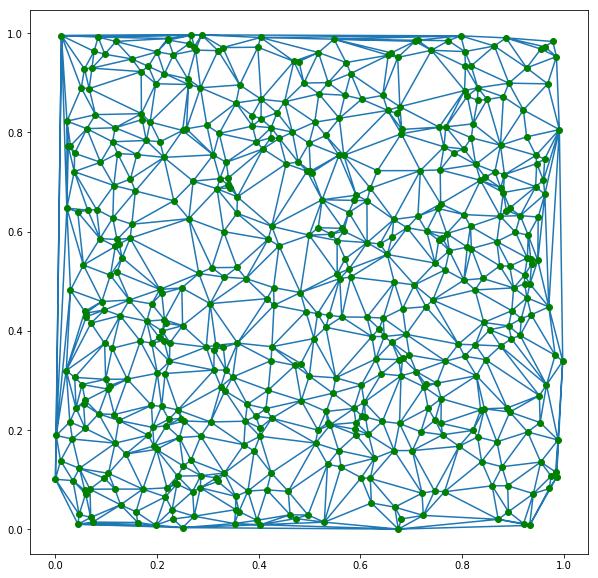

In [3]:
tri = Delaunay(points)

plt.triplot(points[:,0], points[:,1], tri.simplices.copy())
plt.plot(points[:,0], points[:,1], 'go')
plt.show()

## 2. Separating the solution

For each vertex of the resulting graph, let's consider its "triangulation neighbors", what can do the function

In [4]:
def find_neighbors(p_ind, triang):
    neighbors = []
    for simplex in triang.vertices:
        if p_ind in simplex:
            neighbors += [simplex[i] for i in range(len(simplex)) if simplex[i] != p_ind]
    return list(set(neighbors))

Now we need to choose the closest neighbor for each vertex in our set:

In [5]:
res = []
for ind in range(N):
    mindist = INF
    min_ind = None
    for n_ind in find_neighbors(ind, tri):
        dist = np.linalg.norm(points[ind] - points[n_ind]) # distance between current pair of neighbor points
        if dist < mindist:
            mindist = dist
            nn_ind = n_ind
    res += [[ind, nn_ind]]
# print(res) # triangulation triplets

Finally, visualing the geometric solution:

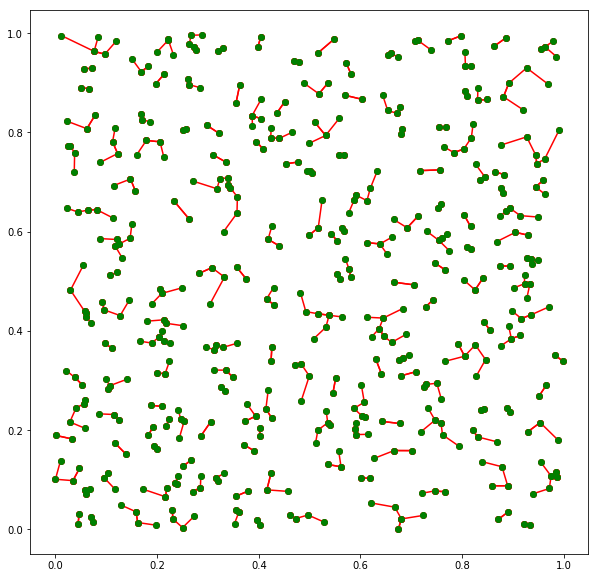

In [6]:
for pair in res:
    x1, x2 = points[pair[0]][0], points[pair[1]][0]
    y1, y2 = points[pair[0]][1], points[pair[1]][1]
    plt.plot([x1, x2], [y1, y2], 'ro-')

plt.plot(points[:,0], points[:,1], 'go')
plt.show()

## 3D-case

Let's move to a larger dimension. For example, we have some surface that is given by the formula

$$z = sin(0.1y)5^{cos(0.4x)}$$

Now we're going to visualise it and build triangulation ('skeleton').

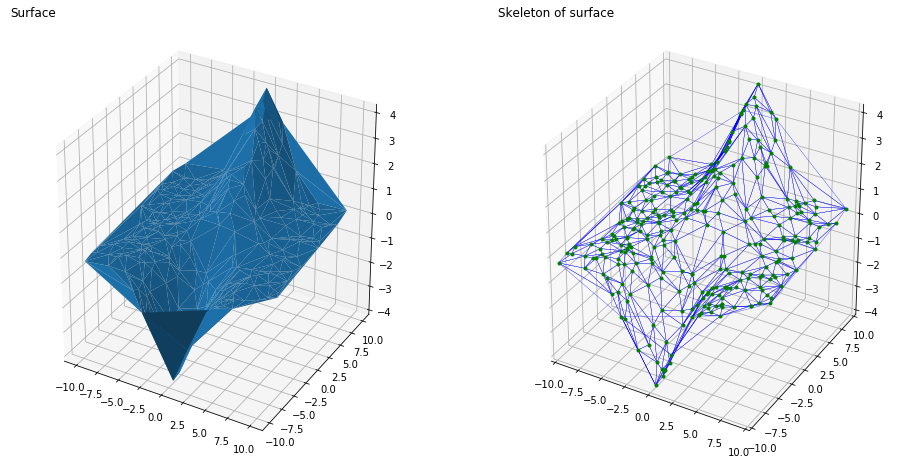

In [7]:
def makeData():
    # points = np.random.rand(M, 3)
    # x, y, z = points[:,0], points[:,1], points[:,2]
    x = np.random.rand(M) * 20.0 - 10.0
    y = np.random.rand(len(x)) * 20.0 - 10.0
    z = np.sin(y * 0.1) * (np.power(5, np.cos(x * 0.4)))
    return x, y, z


x, y, z = makeData()
points = np.column_stack((x, np.column_stack((y, z))))


'''plotting surface'''
fig = pylab.figure(figsize=plt.figaspect(0.5))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_trisurf(x, y, z)
ax1.set_title("Surface", loc='left')


'''plotting triangulation'''
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
tri = Delaunay(points)
ax2.plot_trisurf(x, y, z, triangles=tri.simplices, color=(0,0,0,0), edgecolor='b', linewidth=0.3)
ax2.plot(points[:,0], points[:,1], points[:,2], 'go', markersize=3)
ax2.set_title("Skeleton of surface", loc='left')

res = []
for ind in range(M):
    mindist = INF
    min_ind = None
    for n_ind in find_neighbors(ind, tri):
        dist = np.linalg.norm(points[ind] - points[n_ind]) # distance between current pair of neighbor points
        if dist < mindist:
            mindist = dist
            nn_ind = n_ind
    res += [[ind, nn_ind]]
# print(res) # triangulation triplets

pylab.xlim(-10, 10)
pylab.ylim(-10, 10)
pylab.show()

And, finally, separate the solution from it:

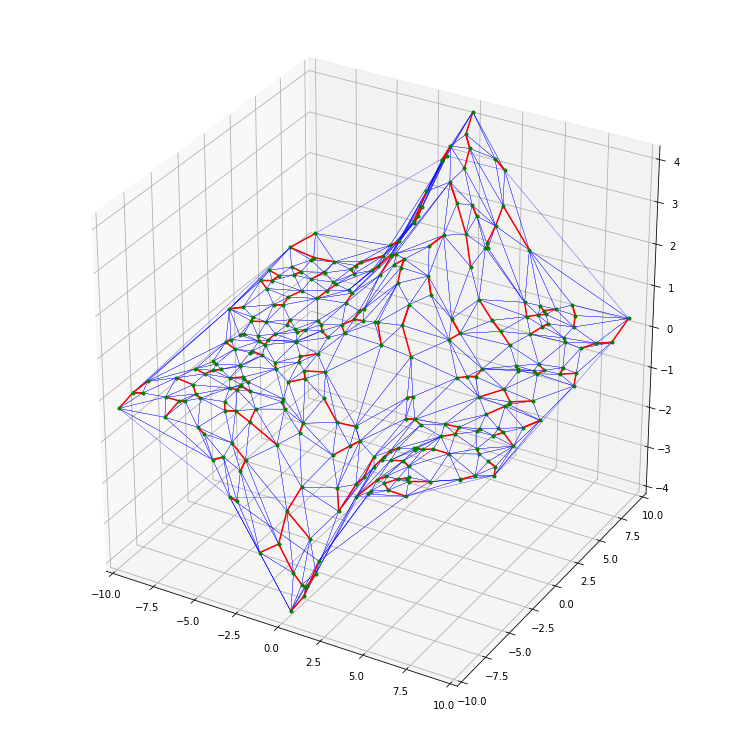

In [8]:
fig = pylab.figure()
ax = Axes3D(fig)

ax.plot_trisurf(x, y, z, triangles=tri.simplices, color=(0,0,0,0), edgecolor='b', linewidth=0.3)

for pair in res:
    x1, x2 = points[pair[0]][0], points[pair[1]][0]
    y1, y2 = points[pair[0]][1], points[pair[1]][1]
    z1, z2 = points[pair[0]][2], points[pair[1]][2]
    ax.plot([x1, x2], [y1, y2], [z1, z2], color='r', markersize=3)

ax.plot(points[:,0], points[:,1], points[:,2], 'go', markersize=3)

pylab.xlim(-10, 10)
pylab.ylim(-10, 10)
pylab.show()